## IMPORTING PACKAGES

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading data

In [79]:
df_mkt= pd.read_csv (r"C:\Users\avalerio\OneDrive - Microsoft\Desktop\NOVA\DSML\Clustering Project (1st Project)-20230318\mkt.csv")

df_mkt .head (3)

,CustomerID,Response_Cmp1,Response_Cmp2,Response_Cmp3,Response_Cmp4,Response_Cmp5
0,31958,0,0,0,0,0
1,5387,0,0,0,0,0
2,32006,0,0,0,0,0


In [80]:
df_mkt.tail (3)

,CustomerID,Response_Cmp1,Response_Cmp2,Response_Cmp3,Response_Cmp4,Response_Cmp5
7020,18890,0,0,0,0,0
7021,30206,0,0,0,0,0
7022,16466,0,0,0,0,0


In [81]:
df_mkt.shape

(7023, 6)

In [82]:
df_mkt.dtypes

CustomerID       int64
Response_Cmp1    int64
Response_Cmp2    int64
Response_Cmp3    int64
Response_Cmp4    int64
Response_Cmp5    int64
dtype: object

In [83]:
df_mkt.columns

Index(['CustomerID', 'Response_Cmp1', 'Response_Cmp2', 'Response_Cmp3',
       'Response_Cmp4', 'Response_Cmp5'],
      dtype='object')

In [84]:
df_mkt.rename(columns =
                    {"Response_Cmp1" : "Res_Cmp1", "Response_Cmp2" : "Res_Cmp2", 
                     "Response_Cmp3": "Res_Cmp3", "Response_Cmp4" : "Res_Cmp4", 
                    "Response_Cmp5" : "Res_Cmp5"}, inplace= True
             )

### Check for duplicates

In [85]:
df_mkt.duplicated(subset=['CustomerID'])

0       False
1       False
2       False
3       False
4       False
        ...  
7018    False
7019    False
7020    False
7021    False
7022    False
Length: 7023, dtype: bool

In [86]:
len(df_mkt['CustomerID'])-len(df_mkt['CustomerID'].drop_duplicates())

23

In [87]:
#check for missing value

df_mkt.isna()

,CustomerID,Res_Cmp1,Res_Cmp2,Res_Cmp3,Res_Cmp4,Res_Cmp5
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
7018,False,False,False,False,False,False
7019,False,False,False,False,False,False
7020,False,False,False,False,False,False
7021,False,False,False,False,False,False


In [88]:
df_mkt.drop_duplicates(subset=['CustomerID'], inplace=True)

df_mkt

,CustomerID,Res_Cmp1,Res_Cmp2,Res_Cmp3,Res_Cmp4,Res_Cmp5
0,31958,0,0,0,0,0
1,5387,0,0,0,0,0
2,32006,0,0,0,0,0
3,7511,0,0,0,0,0
4,12308,0,0,0,0,0
...,...,...,...,...,...,...
7018,22358,0,0,0,0,0
7019,29516,0,0,0,0,0
7020,18890,0,0,0,0,0
7021,30206,0,0,0,0,0


In [89]:
df_mkt.isna().sum()

CustomerID    0
Res_Cmp1      0
Res_Cmp2      0
Res_Cmp3      0
Res_Cmp4      0
Res_Cmp5      0
dtype: int64

In [90]:
df_mkt.describe()

,CustomerID,Res_Cmp1,Res_Cmp2,Res_Cmp3,Res_Cmp4,Res_Cmp5
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,20066.401571,0.079143,0.073286,0.083000,0.065857,0.014286
std,8684.030062,0.269981,0.260624,0.275902,0.248050,0.118675
min,5078.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12507.500000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,20099.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,27587.750000,0.000000,0.000000,0.000000,0.000000,0.000000
max,35072.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [91]:
df_mkt.groupby(['CustomerID'])[['Res_Cmp1', 'Res_Cmp2','Res_Cmp3','Res_Cmp4', 'Res_Cmp5']].value_counts()

CustomerID  Res_Cmp1  Res_Cmp2  Res_Cmp3  Res_Cmp4  Res_Cmp5
5078        0         1         0         0         0           1
5081        0         0         0         0         0           1
5084        1         0         0         0         0           1
5087        0         0         0         0         0           1
5090        0         0         0         1         0           1
                                                               ..
35057       0         0         0         0         0           1
35063       0         0         0         1         0           1
35066       0         1         1         0         0           1
35069       0         0         0         0         0           1
35072       0         0         0         0         0           1
Length: 7000, dtype: int64

In [92]:
# groupby() function to count 0 and 1 values in each column
mkt = df_mkt.groupby(['Res_Cmp1', 'Res_Cmp2','Res_Cmp3','Res_Cmp4', 'Res_Cmp5']).count()

print(mkt)


                                              CustomerID
Res_Cmp1 Res_Cmp2 Res_Cmp3 Res_Cmp4 Res_Cmp5            
0        0        0        0        0               5439
                                    1                 12
                           1        0                150
                  1        0        0                232
                                    1                  3
                           1        0                 89
                                    1                  8
         1        0        0        0                263
                                    1                 16
                           1        0                 47
                                    1                  6
                  1        0        0                 84
                                    1                  8
                           1        0                 60
                                    1                 29
1        0        0        0   

In [93]:
no_action = df_mkt[['Res_Cmp1', 'Res_Cmp2','Res_Cmp3','Res_Cmp4', 'Res_Cmp5']].apply(lambda x: x.eq(0).sum())

print(no_action)


Res_Cmp1    6446
Res_Cmp2    6487
Res_Cmp3    6419
Res_Cmp4    6539
Res_Cmp5    6900
dtype: int64


In [94]:
success_rate = df_mkt[['Res_Cmp1', 'Res_Cmp2','Res_Cmp3','Res_Cmp4', 'Res_Cmp5']].apply(lambda x: x.eq(1).sum())

print(success_rate)

Res_Cmp1    554
Res_Cmp2    513
Res_Cmp3    581
Res_Cmp4    461
Res_Cmp5    100
dtype: int64


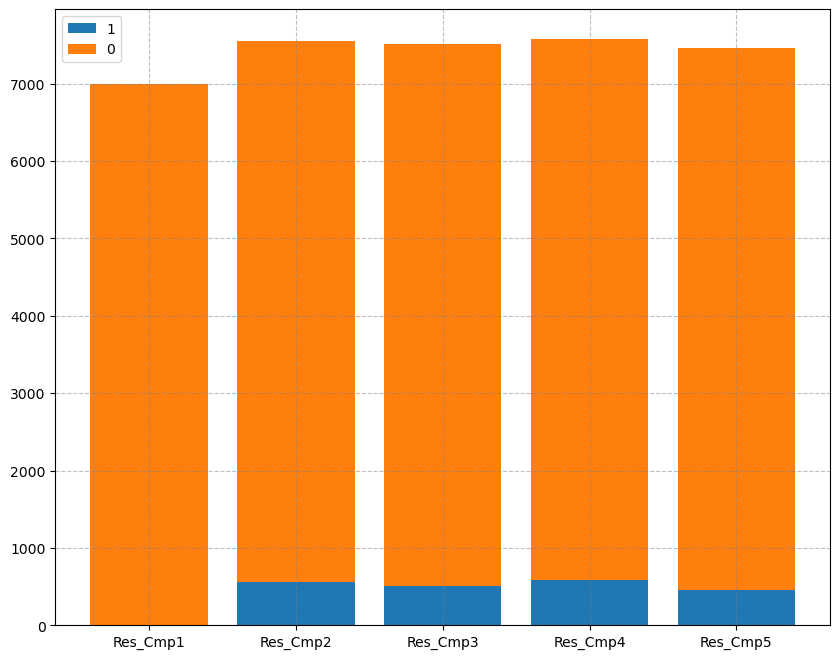

In [95]:
fig, ax = plt.subplots(figsize=(10,8))
ax.bar(df_mkt.columns[1:], df_mkt.eq(1).count()[:-1].values, label='1')
ax.bar(df_mkt.columns[1:], df_mkt.eq(1).count()[:-1].values, bottom=df_mkt.eq(1).sum()[:-1].values, label='0')
ax.legend()
ax.grid(True, linestyle='--', color='gray', alpha=0.5)
plt.show()
